In [1]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
model = YOLO('yolov8n-seg.yaml') # building a model of instance segmentation, this only brings the structure with random weights;
model = YOLO('yolov8n-seg.pt') # now, filling thats trcuture with random weights;

100%|██████████| 6.73M/6.73M [00:00<00:00, 75.1MB/s]


In [ ]:
# as this is not trained on our dataset particularly, so i am gonna finetune it;

In [4]:
# number of classes based on YAML, basically reading the YAML, as the YAMLfile contains all the info, the no of classes, the path of test(if any), train, val images;
import yaml
with open("/content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/Diverse_Image_Dataset/Yolov8/data_colab_yolov8_diverse_cells.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [5]:
num_classes

'1'

In [7]:
%cat "/content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/Diverse_Image_Dataset/Yolov8/data_colab_yolov8_diverse_cells.yaml"

train: /content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/Diverse_Image_Dataset/Yolov8/train
val: /content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/Diverse_Image_Dataset/Yolov8/valid

nc: 1
names: ['Cell']


In [8]:
epochs = 50

In [9]:
project = "/content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/result_yolo" # a directory, that holds all the training things;
name = str(epochs) # a sub-directory for specific no. of epochs; if again run, then will create another folder as "no_of_epochs"-2;

In [10]:
results = model.train(data="/content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/Diverse_Image_Dataset/Yolov8/data_colab_yolov8_diverse_cells.yaml", # --> the data is only the yaml file, as this only says where the training and val data staying;
                      project=project, # the project directory;
                      name=name,
                      epochs= epochs,
                      patience=0,
                      batch=4,
                      imgsz=800)


Ultralytics YOLOv8.2.8 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/Diverse_Image_Dataset/Yolov8/data_colab_yolov8_diverse_cells.yaml, epochs=50, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/result_yolo, name=50, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=F

100%|██████████| 755k/755k [00:00<00:00, 15.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 78.2MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/Diverse_Image_Dataset/Yolov8/train/labels... 1116 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1116/1116 [05:38<00:00,  3.30it/s]


train: New cache created: /content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/Diverse_Image_Dataset/Yolov8/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/Diverse_Image_Dataset/Yolov8/valid/labels... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:37<00:00,  1.51it/s]

val: New cache created: /content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/Diverse_Image_Dataset/Yolov8/valid/labels.cache


Plotting labels to /content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/result_yolo/50/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/result_yolo/50
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.9G      0.923      1.473      1.232     0.9848        221        800: 100%|██████████| 279/279 [02:18<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all         56       1196      0.911      0.899      0.949      0.774      0.903      0.882      0.926      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.11G     0.9415      1.452     0.8913     0.9898        101        800: 100%|██████████| 279/279 [02:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all         56       1196       0.93      0.883      0.951      0.785      0.935      0.863      0.933      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      14.5G     0.9099      1.443     0.8063     0.9901        144        800: 100%|██████████| 279/279 [02:04<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]

                   all         56       1196       0.91      0.899      0.954      0.782      0.916      0.878      0.931      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      14.1G     0.8757      1.369      0.738     0.9797        331        800: 100%|██████████| 279/279 [02:02<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all         56       1196      0.939      0.923      0.973      0.814      0.937      0.913      0.956      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      9.48G     0.8658      1.307     0.6827     0.9684        100        800: 100%|██████████| 279/279 [02:05<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]

                   all         56       1196      0.943      0.935      0.971      0.825      0.925      0.916      0.942      0.716



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.3G     0.8513      1.268     0.6454     0.9686        146        800: 100%|██████████| 279/279 [02:07<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]

                   all         56       1196      0.939      0.924      0.969      0.803      0.944      0.896      0.953      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.22G     0.8326      1.249     0.6129     0.9593         23        800: 100%|██████████| 279/279 [02:04<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]

                   all         56       1196      0.936      0.926      0.974       0.82      0.931      0.917      0.957       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.56G     0.8248      1.235     0.5755     0.9516         24        800: 100%|██████████| 279/279 [02:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.67it/s]

                   all         56       1196      0.953      0.949      0.979      0.846       0.94       0.93      0.963      0.733



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      10.8G     0.8015      1.192     0.5588     0.9462        362        800: 100%|██████████| 279/279 [02:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all         56       1196      0.952       0.93      0.977      0.835      0.949      0.922      0.967      0.763



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      12.6G     0.8174       1.19     0.5611     0.9483         81        800: 100%|██████████| 279/279 [02:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all         56       1196      0.962       0.94      0.979      0.818      0.957      0.926      0.963      0.735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.14G     0.8302      1.215     0.5593     0.9527        103        800: 100%|██████████| 279/279 [02:02<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]

                   all         56       1196      0.953      0.937      0.982       0.83      0.954       0.93      0.972      0.763



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      13.1G     0.7934      1.144     0.5296      0.936        118        800: 100%|██████████| 279/279 [02:07<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all         56       1196      0.946      0.931      0.975      0.823      0.942      0.923      0.963      0.757



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      9.03G     0.7812      1.148      0.514     0.9381        161        800: 100%|██████████| 279/279 [02:07<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]

                   all         56       1196      0.964      0.953      0.987      0.861      0.953       0.93      0.967      0.764



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      13.7G     0.7657      1.108     0.4988     0.9338         72        800: 100%|██████████| 279/279 [02:03<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.33it/s]

                   all         56       1196      0.966      0.954      0.985      0.859       0.96      0.938      0.972      0.765



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.18G     0.7733      1.115      0.497     0.9331        136        800: 100%|██████████| 279/279 [02:07<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]


                   all         56       1196      0.971      0.938      0.982      0.851      0.961      0.931      0.976      0.786

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.79G     0.7827      1.124     0.4928       0.93        307        800: 100%|██████████| 279/279 [02:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]

                   all         56       1196      0.961      0.966      0.988      0.844       0.95      0.955      0.979      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.92G     0.8022      1.121     0.4893     0.9345        199        800: 100%|██████████| 279/279 [02:09<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]

                   all         56       1196      0.962      0.959      0.985      0.855      0.958      0.955      0.979      0.783



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.77G     0.7917      1.113     0.4899     0.9302        248        800: 100%|██████████| 279/279 [02:06<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]

                   all         56       1196      0.952      0.958      0.983      0.861      0.944      0.931      0.963      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50        10G     0.7814      1.096     0.4704      0.926         63        800: 100%|██████████| 279/279 [02:10<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]

                   all         56       1196       0.97       0.95      0.984      0.861      0.958      0.937      0.969      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50        10G     0.7829      1.108     0.4752      0.926         26        800: 100%|██████████| 279/279 [02:07<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]

                   all         56       1196      0.965      0.952      0.987      0.857      0.953      0.939      0.974      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.25G     0.7595      1.096     0.4745     0.9269         93        800: 100%|██████████| 279/279 [02:03<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all         56       1196      0.961      0.958      0.983      0.865      0.953      0.947      0.974      0.789



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      11.1G     0.7691      1.086      0.453     0.9243        245        800: 100%|██████████| 279/279 [02:06<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all         56       1196      0.961      0.945      0.984      0.856      0.949      0.924      0.959      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      14.9G      0.779      1.073     0.4581     0.9268         80        800: 100%|██████████| 279/279 [02:03<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all         56       1196      0.954      0.961      0.984      0.844      0.955      0.937      0.975      0.774



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.9G     0.7447      1.043     0.4469      0.919        133        800: 100%|██████████| 279/279 [02:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.47it/s]

                   all         56       1196      0.964      0.961      0.984      0.868      0.968      0.948      0.976      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.98G     0.7505      1.052     0.4378      0.918        132        800: 100%|██████████| 279/279 [02:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.32it/s]

                   all         56       1196      0.969       0.96      0.987      0.869      0.961      0.948      0.974      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      15.4G     0.7473      1.036     0.4305     0.9154        124        800: 100%|██████████| 279/279 [02:07<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all         56       1196      0.969      0.953      0.986      0.871      0.967      0.946      0.977      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      15.3G     0.7363      1.023     0.4317     0.9151         67        800: 100%|██████████| 279/279 [02:03<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]


                   all         56       1196      0.968      0.962      0.984      0.868      0.964      0.947      0.974      0.795

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      14.4G     0.7338      1.005     0.4277     0.9166         66        800: 100%|██████████| 279/279 [02:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]


                   all         56       1196      0.972      0.967      0.987      0.866      0.964      0.959      0.976      0.795

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      14.5G      0.736      1.025     0.4264     0.9147         87        800: 100%|██████████| 279/279 [02:02<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]

                   all         56       1196      0.971      0.962      0.986      0.872      0.968      0.947      0.975      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      9.06G     0.7237      1.003     0.4228     0.9103        481        800: 100%|██████████| 279/279 [02:04<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all         56       1196      0.969      0.955      0.985      0.879       0.97      0.942      0.976      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.35G     0.7291      1.009     0.4227     0.9097         86        800: 100%|██████████| 279/279 [02:03<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.40it/s]

                   all         56       1196      0.964      0.958      0.985      0.872      0.955      0.949      0.976      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50       5.9G     0.7222      1.019     0.4185       0.91         59        800: 100%|██████████| 279/279 [02:05<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all         56       1196       0.97      0.961      0.984      0.872      0.961      0.952       0.97      0.809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      12.9G     0.7229     0.9905     0.4149     0.9036        127        800: 100%|██████████| 279/279 [02:03<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.19it/s]

                   all         56       1196      0.955      0.969      0.986      0.875      0.958      0.942      0.973      0.813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      11.7G     0.7016     0.9703     0.4019      0.903        363        800: 100%|██████████| 279/279 [02:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]

                   all         56       1196      0.964      0.968      0.987      0.884      0.965      0.957      0.982      0.822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      11.2G     0.7142     0.9806     0.4009     0.9072         49        800: 100%|██████████| 279/279 [02:04<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]

                   all         56       1196      0.968      0.962      0.986       0.88      0.963      0.952      0.979      0.821



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      13.7G     0.7025     0.9656     0.4021     0.9046        112        800: 100%|██████████| 279/279 [02:03<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]

                   all         56       1196      0.965      0.959      0.985      0.881      0.963      0.951      0.979      0.824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      13.7G     0.7051     0.9592     0.4004     0.9021        295        800: 100%|██████████| 279/279 [02:00<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]

                   all         56       1196      0.967       0.97      0.988      0.891      0.959      0.965       0.98      0.829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.54G     0.7109     0.9734      0.397     0.9016        427        800: 100%|██████████| 279/279 [02:04<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.15it/s]

                   all         56       1196      0.957      0.967      0.983      0.879      0.951       0.96      0.975      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.62G     0.7326     0.9955     0.4073     0.9095        209        800:  18%|█▊        | 50/279 [00:21<01:36,  2.36it/s]


KeyboardInterrupt: 

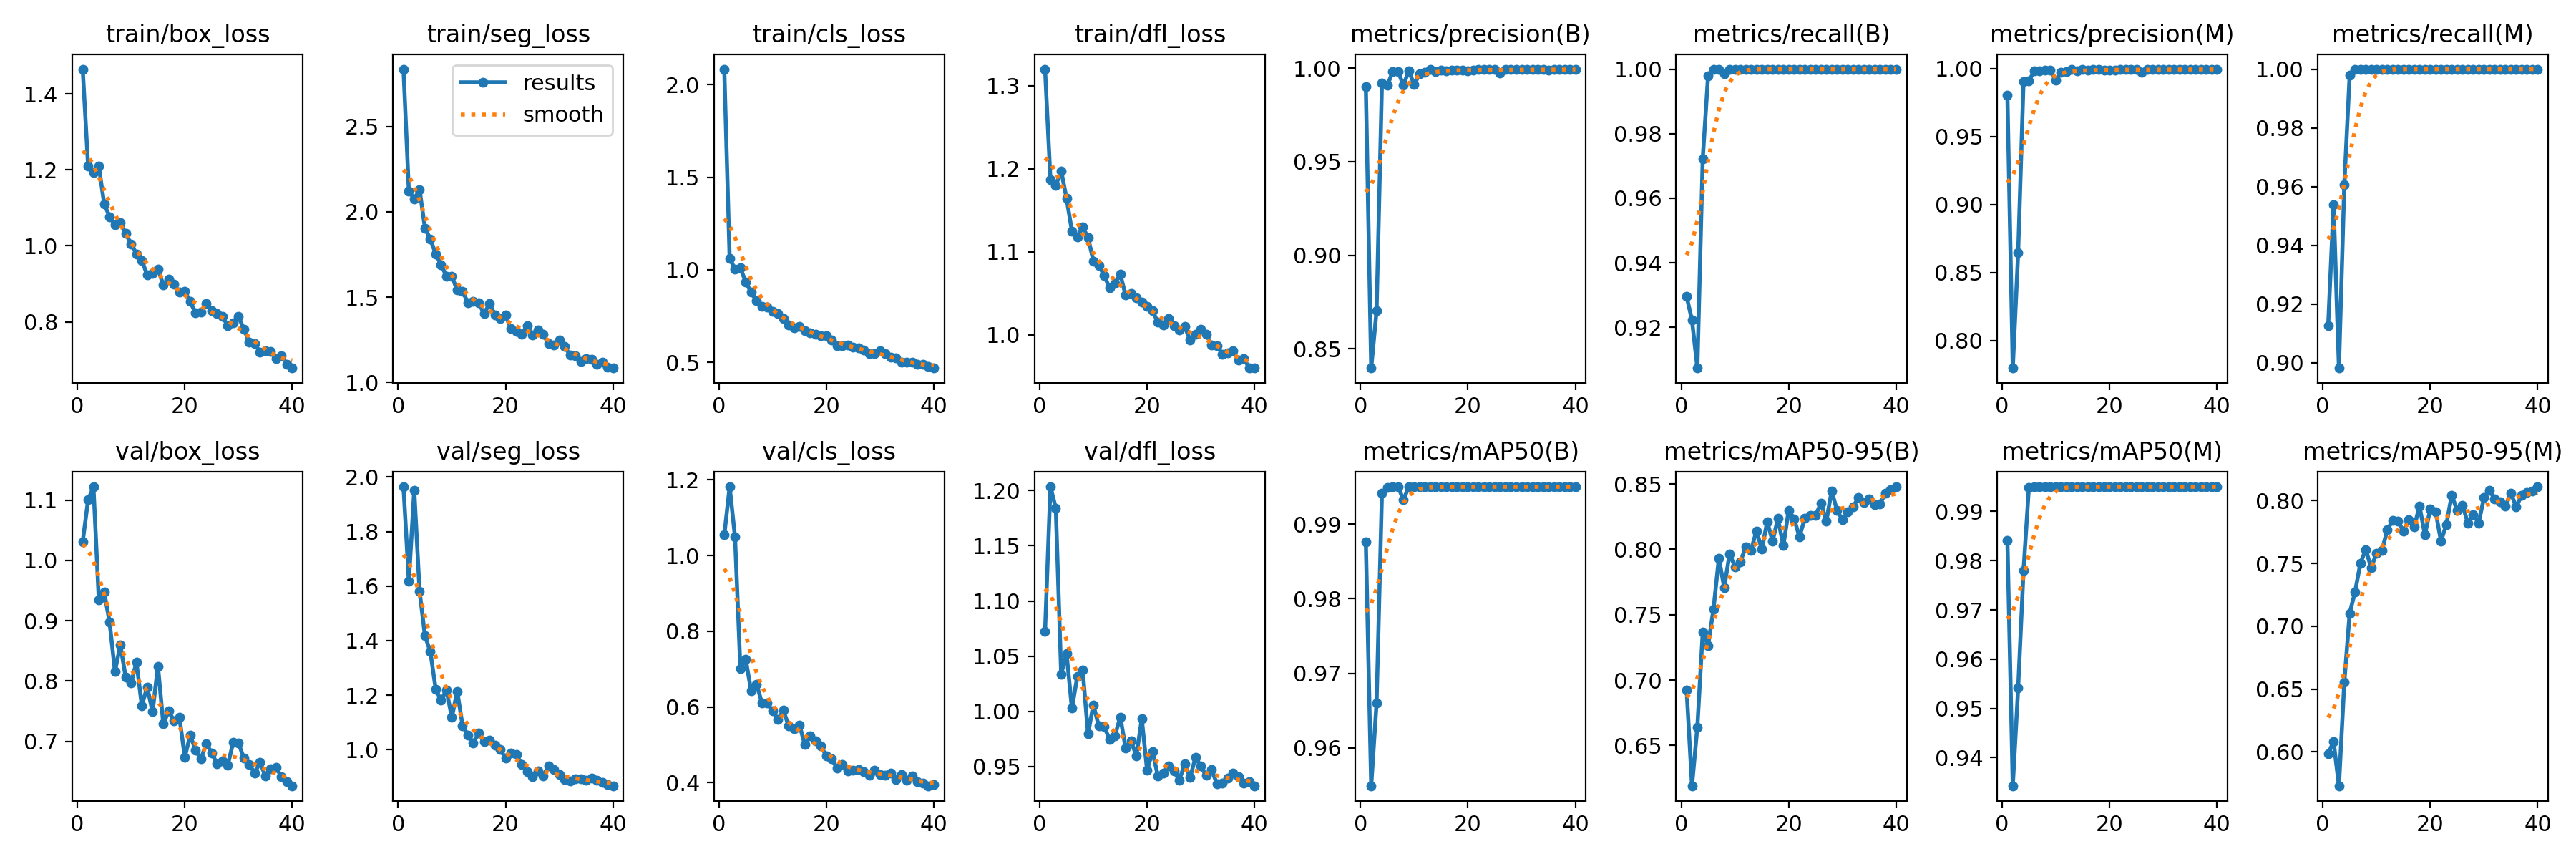

In [ ]:
# All training curves, metrics, and other results are stored as images in the 'runs' directory
from IPython.display import Image
Image("/content/drive/MyDrive/YOLOv8_with_teeth/results_of_training/40/results.png")

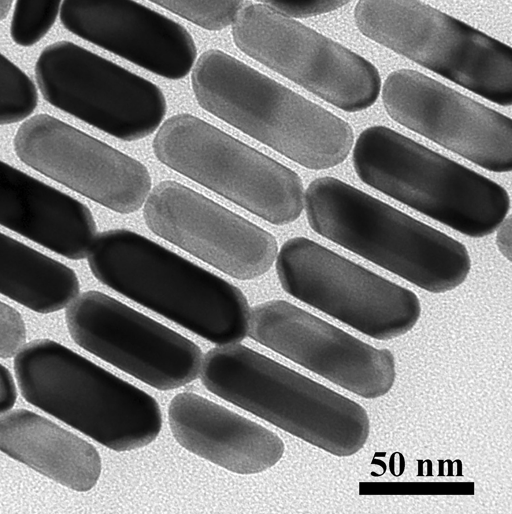

In [56]:
from PIL import Image

filename = "/content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/Diverse_Image_Dataset/test/imgs/fc2851e6d3.png"
image = Image.open(filename)

# Display the image with a width of 900 pixels
image.thumbnail((900, 900))
display(image)

In [ ]:
# now i am loading the last custom model --> /content/drive/MyDrive/YOLOv8_with_cell_+_mitochondria_+_alpha_granule_+_canalicular_vessels/results_of_training/200_epochs-/weights/last.pt
# .pt --> means pretrained weights;

In [16]:
my_new_model = YOLO('/content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/result_yolo/50/weights/best.pt')

In [57]:
new_image = '/content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/Diverse_Image_Dataset/test/imgs/fc2851e6d3.png' # loading a new test image;
new_results = my_new_model.predict(new_image, conf=0.01)  # predicting objects on that image by my trained model; conf=0.2 --> confidence score;



image 1/1 /content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/Diverse_Image_Dataset/test/imgs/fc2851e6d3.png: 800x800 43 Cells, 17.9ms
Speed: 6.4ms preprocess, 17.9ms inference, 25.3ms postprocess per image at shape (1, 3, 800, 800)


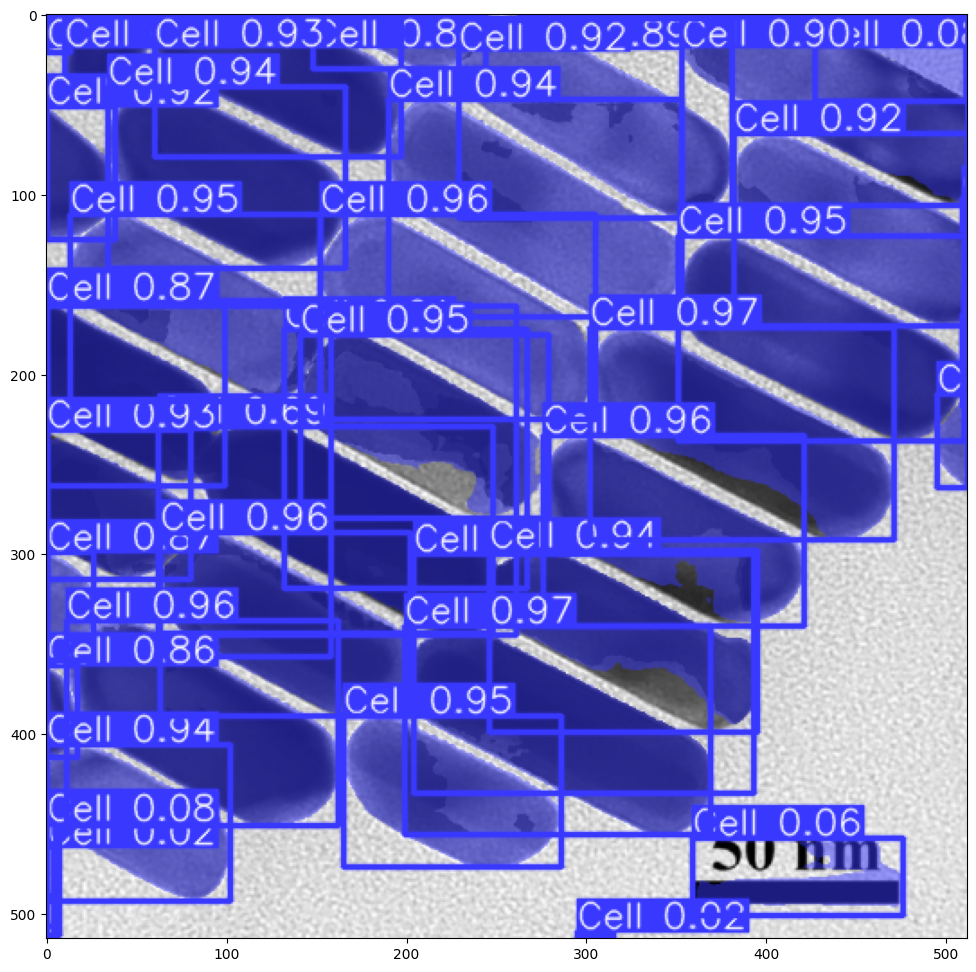

In [58]:
# plotting;
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

In [59]:
new_result = new_results[0]
new_result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'Cell'}
obb: None
orig_img: array([[[110, 110, 110],
        [110, 110, 110],
        [114, 114, 114],
        ...,
        [203, 203, 203],
        [227, 227, 227],
        [251, 251, 251]],

       [[106, 106, 106],
        [108, 108, 108],
        [114, 114, 114],
        ...,
        [195, 195, 195],
        [216, 216, 216],
        [235, 235, 235]],

       [[109, 109, 109],
        [106, 106, 106],
        [112, 112, 112],
        ...,
        [208, 208, 208],
        [209, 209, 209],
        [202, 202, 202]],

       ...,

       [[251, 251, 251],
        [240, 240, 240],
        [234, 234, 234],
        ...,
        [231, 231, 231],
        [240, 240, 240],
        [225, 225, 225]],

       [[252, 252, 252],
        [236, 236, 236],
        [227, 227, 227],
        ...,
        [245, 245, 245],
     

In [60]:
new_result.masks.xyn # 'Masks.xyn' --> segments (normalized) --> polygons, 'Masks.xy' --> segments (pixels); extracting bounding polygons

[array([[    0.62298,        0.34],
        [    0.62172,     0.34125],
        [    0.62047,     0.34125],
        [     0.6167,       0.345],
        [    0.61419,       0.345],
        [    0.61294,     0.34625],
        [    0.61168,     0.34625],
        [    0.60039,      0.3575],
        [    0.60039,        0.36],
        [    0.59914,     0.36125],
        [    0.59914,      0.3625],
        [    0.59537,     0.36625],
        [    0.59537,        0.37],
        [    0.59412,     0.37125],
        [    0.59412,     0.37375],
        [    0.59286,       0.375],
        [    0.59286,     0.37875],
        [    0.59161,        0.38],
        [    0.59161,     0.40125],
        [    0.59286,      0.4025],
        [    0.59286,      0.4075],
        [    0.59412,     0.40875],
        [    0.59412,      0.4125],
        [    0.59537,     0.41375],
        [    0.59537,       0.425],
        [    0.59663,     0.42625],
        [    0.59663,      0.4275],
        [    0.59914,       

In [61]:
# extracting segmented masks;
extracted_masks = new_result.masks.data

In [62]:
extracted_masks.shape

torch.Size([43, 800, 800])

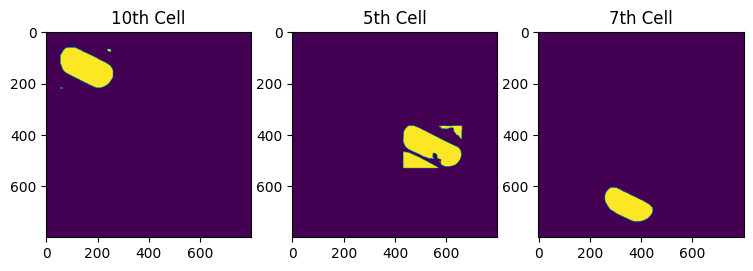

In [64]:
masks_array = extracted_masks.cpu().numpy() # pushing the masks into CPU from GPU for converting into numpy array and for better plotting;

plt.figure(figsize=(9, 12))
plt.subplot(2, 3, 1)
plt.title("10th Cell")
plt.imshow(masks_array[10])
plt.subplot(2, 3, 2)
plt.title("5th Cell")
plt.imshow(masks_array[5])
plt.subplot(2, 3, 3)
plt.title("7th Cell")
plt.imshow(masks_array[7])
plt.show()


In [65]:
class_names = new_result.names.values()
class_names

dict_values(['Cell'])

In [66]:
detected_boxes = new_result.boxes.data
class_labels = detected_boxes[:, -1].int().tolist()
masks_by_class = {name: [] for name in new_result.names.values()}
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())
for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")

Class Name: Cell, Number of Masks: 43


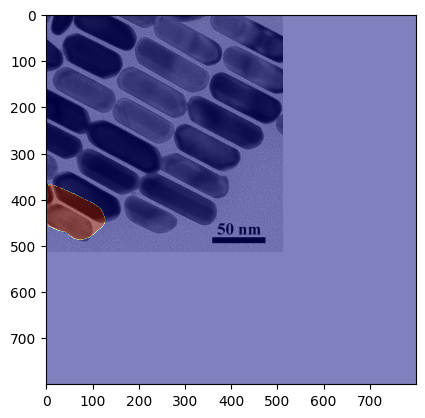

In [72]:
cell_masks = masks_by_class['Cell']
orig_img = new_result.orig_img
plt.imshow(orig_img, cmap='gray')
plt.imshow(cell_masks[14], cmap='jet', alpha=0.5)
plt.axis('on') # Turn off axis labels
plt.show()

In [73]:
import pandas as pd
from skimage.measure import regionprops
props_list = []
for class_name, masks in masks_by_class.items():
    for mask in masks:
        mask = mask.astype(int)
        props = regionprops(mask)
        for prop in props:
            area = prop.area
            perimeter = prop.perimeter
            props_list.append({'Class Name': class_name, 'Area': area, 'Perimeter': perimeter})
props_df = pd.DataFrame(props_list)

In [32]:
props_df.to_csv('/content/drive/MyDrive/Detectron2_vs_YOLOv8_Diverse_Cellular_Segmentation/result_yolo/50/results.csv', index=False)

In [33]:
props_df

,Class Name,Area,Perimeter
0,Cell,39094,743.494516
1,Cell,30067,643.227489
2,Cell,55825,881.820418
3,Cell,36410,705.269119


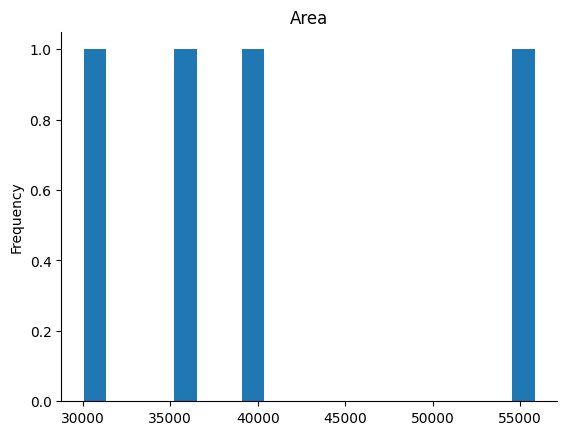

In [34]:
# @title Area

from matplotlib import pyplot as plt
props_df['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)